 # Decion based models. From decision Tree to Random Forest

### Load the Boston Dataset and Prepare the Data
- Load the Boston dataset from sklearn (`sklearn.datasets.load_boston()`).
- Separate the features and the target variable, which is 'medv' in this case.
- Analyse the dataset and process different necessary transformations of the data.
- Split the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('boston_housing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
X = df.loc[:, df.columns != 'medv']
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
y = df[['medv']]
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [4]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


We should normalize columns like crim, tax, and b if we decide to use them

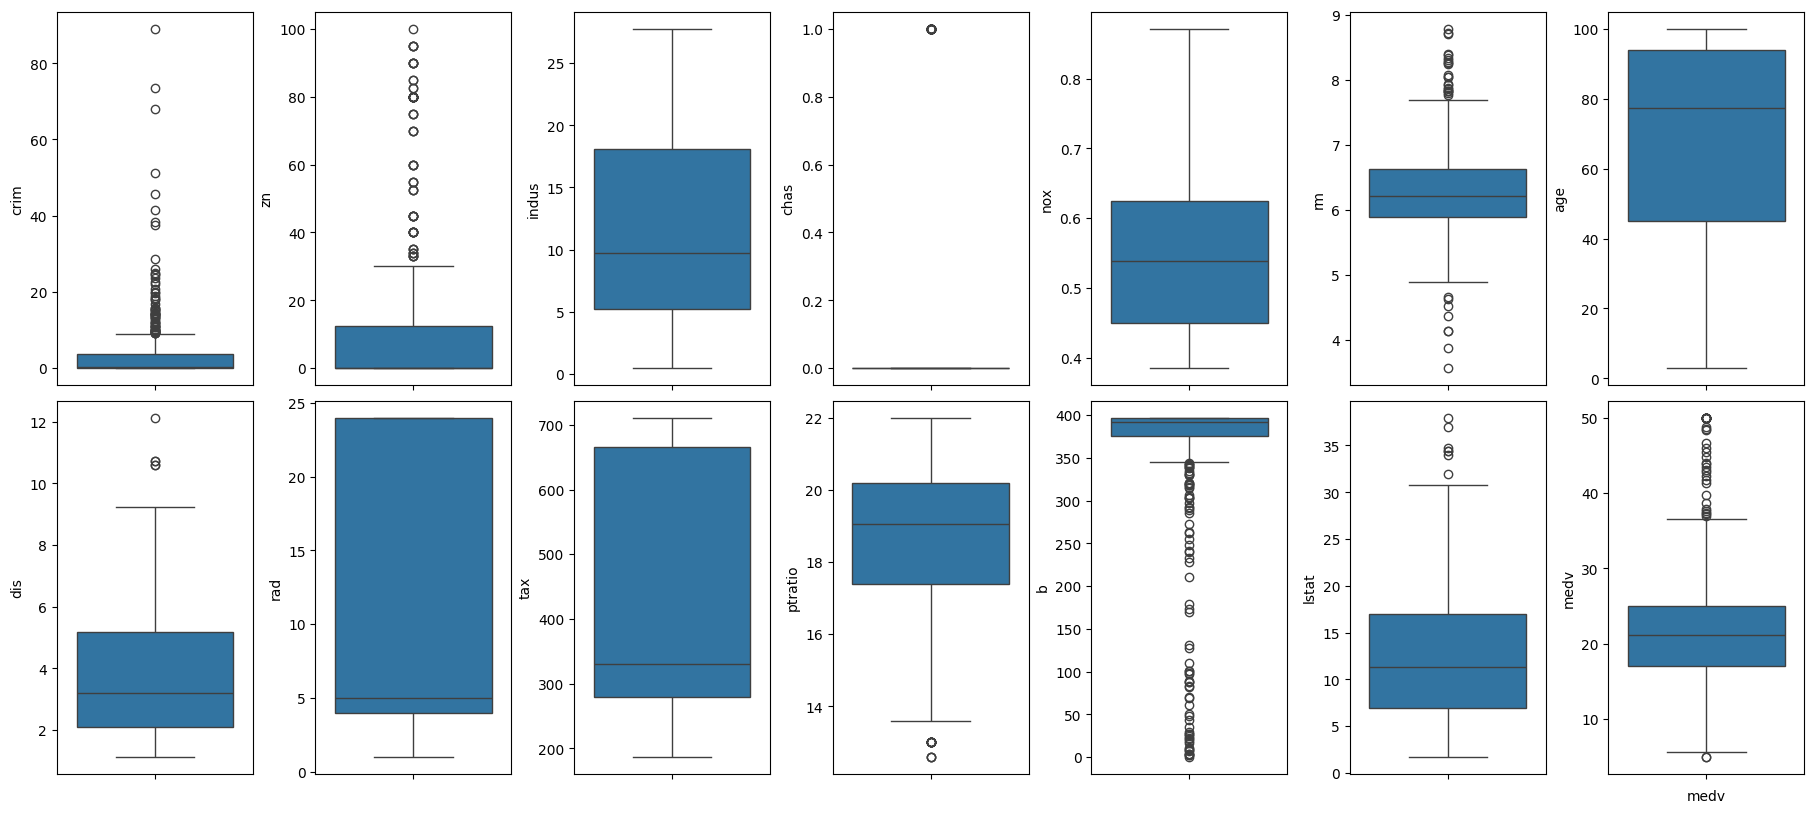

In [5]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(18,8))
i = 0
ax = ax.flatten()
for k, v in df.items():
    sns.boxplot(y=k, data=df, ax=ax[i])
    plt.xlabel(k)
    i += 1
plt.tight_layout(pad=0.2, w_pad=0.5, h_pad=0.5)    

crim, zn, b, and rm feature columns have plenty of outliers.

<Axes: >

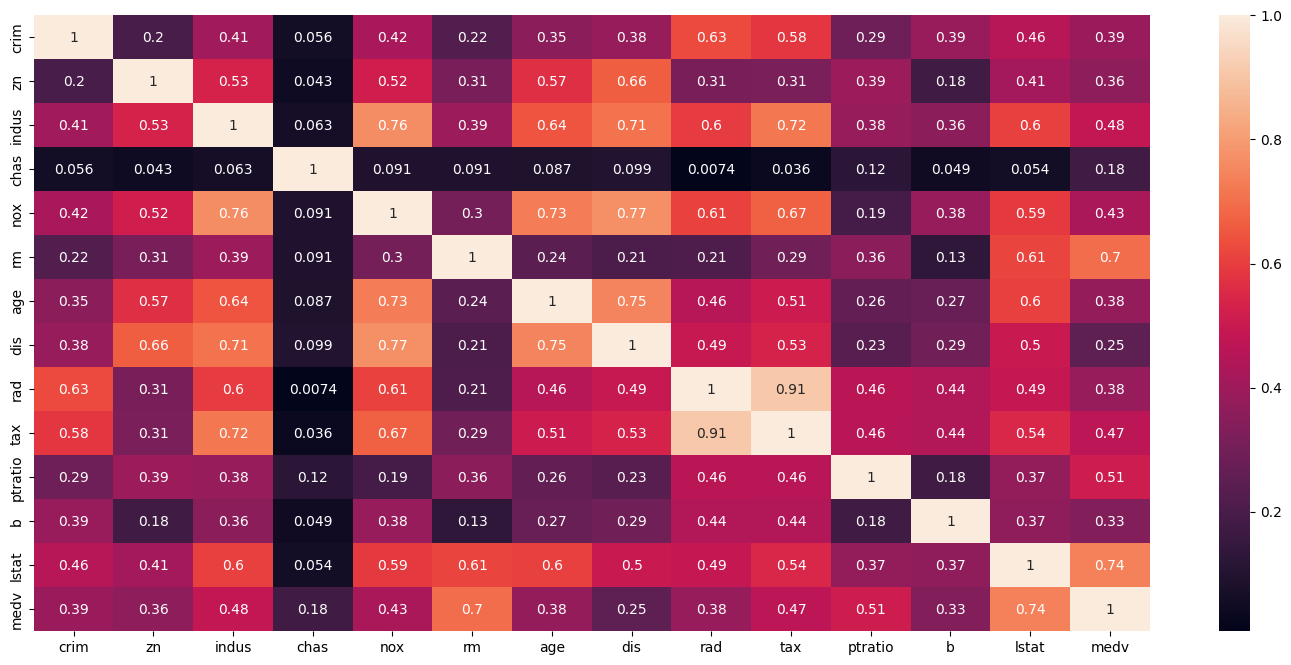

In [6]:
plt.figure(figsize=(18, 8))
sns.heatmap(df.corr().abs(),  annot=True)

Columns like rm, ptratio, tax, nox and lstat have correlation rates above 0.4, which means we can use them to predict the target variable

Now, we have our feature columns. We should normalize them and plot agains the medv target variable to see their correlation

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = ('rm', 'ptratio', 'tax', 'nox', 'lstat')
X = X.loc[:, features]
X = pd.DataFrame(scaler.fit_transform(X), columns=features)
X

,rm,ptratio,tax,nox,lstat
0,0.577505,0.287234,0.208015,0.314815,0.089680
1,0.547998,0.553191,0.104962,0.172840,0.204470
2,0.694386,0.553191,0.104962,0.172840,0.063466
3,0.658555,0.648936,0.066794,0.150206,0.033389
4,0.687105,0.648936,0.066794,0.150206,0.099338
...,...,...,...,...,...
501,0.580954,0.893617,0.164122,0.386831,0.219095
502,0.490324,0.893617,0.164122,0.386831,0.202815
503,0.654340,0.893617,0.164122,0.386831,0.107892
504,0.619467,0.893617,0.164122,0.386831,0.131071


In [8]:
X.describe()

,rm,ptratio,tax,nox,lstat
count,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.521869,0.622929,0.422208,0.349167,0.301409
std,0.134627,0.230313,0.321636,0.238431,0.197049
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.445392,0.510638,0.175573,0.131687,0.144040
50%,0.507281,0.686170,0.272901,0.314815,0.265728
75%,0.586798,0.808511,0.914122,0.491770,0.420116
max,1.000000,1.000000,1.000000,1.000000,1.000000


Now, our data is more or less ready - we chose the appropriate variables and normalized them

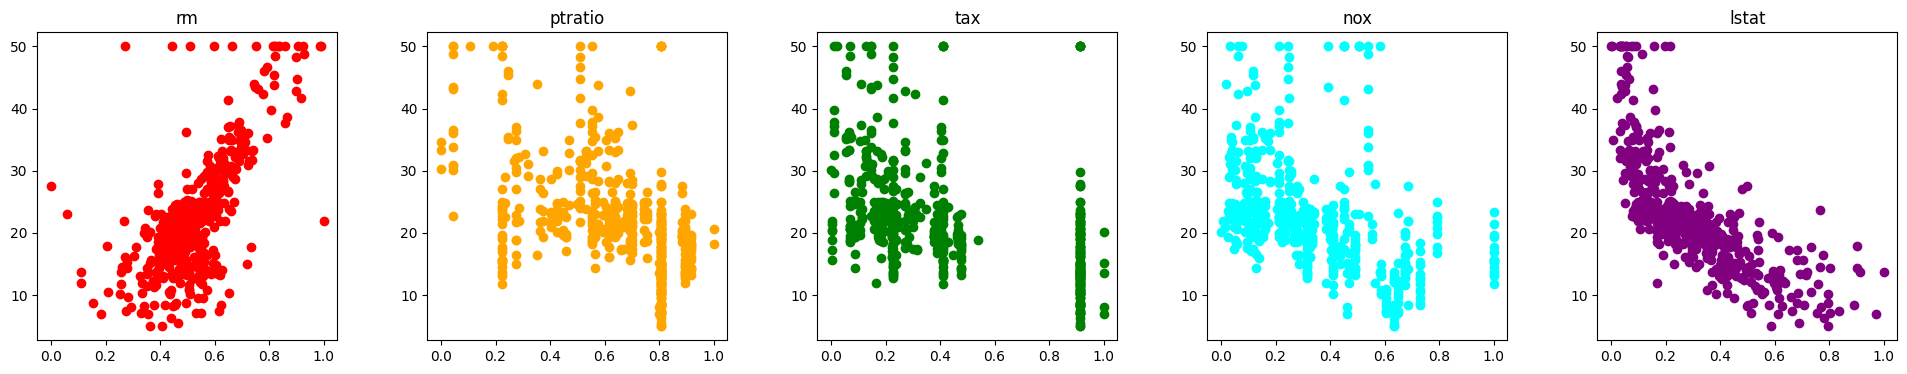

In [9]:
fig, axs = plt.subplots(1, 5, figsize=(24, 4))

plt.subplots_adjust(hspace=0.8, wspace=0.3)
j = 0

colors = ('red', 'orange', 'green', 'cyan', 'purple')

for i, feature in enumerate(features):
    axs[i].scatter(X[feature], y, color=colors[i])
    axs[i].set_title(feature)
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(354, 5) (354, 1) (152, 5) (152, 1)


###  Fit the Regression Tree
- Fit a decision tree to the training data.
- Try to vizualize the behavior of the DT while changing parameters

In [11]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [12]:
print('R2 score on training data: ', dt.score(X_train, y_train))

R2 score on training data:  1.0


In [13]:
from sklearn.metrics import mean_squared_error

y_pred = dt.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2 score on test data: ', dt.score(X_test, y_test))

MSE:  17.019539473684205
R2 score on test data:  0.7922020552684451


In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth' : [None, 5, 10],
    'min_samples_split' : [2,3,4],
    'min_samples_leaf' : [1]
}

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best R2: ', best_score)

Best R2:  0.7458222895725323


In [15]:
print(best_params)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [17]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print('R2 score on traind data after grid search: ', best_model.score(X_train, y_train))
print('R2 score after grid search: ', best_model.score(X_test, y_test))

R2 score on traind data after grid search:  1.0
R2 score after grid search:  0.7922020552684451


### Perform Cost Complexity Pruning
- Apply cost complexity pruning to the regression tree using the appropriate library function : `cost_complexity_pruning_path()`
- Determine the optimal pruning parameter `ccp_alpha` through cross-validation

### Analyze the results
- Use the best estimator obtained from cross-validation to make predictions on the test set
- Utilize the `predict()` method of the best estimator to generate predictions for the test data
- Evaluate the Performance of the Model on the Test Set
- Plot the tree to see if its interpretable

### Some questions

- When learning the tree, we chose a feature to test at each step by maximizing the expected information gain. Does this approach allow us to generate the optimal decision
tree ? Why or why not ? Hint : When playing chess, do you consider only the immediate improvement of your position when deciding on your next move ?

- Why might a Decision Tree work well on a small dataset but perform poorly on a larger one ?

- How does the depth of the tree impact its performance in terms of overfitting and underfitting ?

- How are categorical features handled during splitting ?
 
- In your opinion, why is feature scaling not required when training a Decision Tree ?

- When splitting a node, what happens if all observations have the same target value ?

- What Decision Trees are often described as "white-box models". What does this mean, and why is it beneficial in certain applications ?

- If your dataset is imbalanced, how might this affect the splits chosen by the Decision Tree ? What adjustments could you make to address this ?

## Experiment Boostrapping

- Write a function that creates bootstrap samples by randomly sampling data points with replacement from the training set
- Train multiple Decision Tree models, each using a different bootstrap sample
- Generate predictions from each model for a fixed test set and store the results
- Compute the mean, standard deviation, and range of predictions for each test point across the models

- Create some vizualisation to compare the mean predictions with the true values
- Show the distribution of predictions for a few selected test points

- How does the variance of predictions change across test samples ?
- Why do some test points exhibit higher variance ?
- How does this relate to the overfitting tendency of Decision Trees ?
- How might combining predictions help to reduce variance ?

- Try using a different weak learners with the same setup and compare their prediction variance
- Increase or decrease the number of bootstrap samples. How does this affect the results ?

### Bagging Implementation

- In order to improve the MSE and reduce the variance of the results implement your own Bagging class.

- Recall that Bagging is performed when all predictors (i.e. covariates - features) are used.

- Fit your Bagging regressor to the training data. Compare it to `DecisionTree` Sklearn built-in class.

- Effect of Increasing Trees in Bagging : 
    - Vizualize the effect of increasing the number of weak learners. 
    - Does increasing the number of trees always help ?

### Random Forest
Random Forest introduces additional randomness by restricting the number of features that each tree can consider when splitting a node.

Usually, $\sqrt{p}$ features for classification and $p/3$ for regression, where $p$ is the total number of features.

This restriction decorrelates the trees, reducing the chance of overfitting even further.

- Modify your class to chose the maximum number of features to consider when searching for the best split. 

- Create a plot displaying the test, train and OOB error resulting from random forests for a more comprehensive range of values for max_features and n_estimators
- Describe the results obtained

- Visualize the difference in variance between your Decision Tree and Random Forest (which you can replicate with different parameters).

--- 